Regression with pytorch

In [67]:
# Code by Bhavy Kharbanda
# Sap Id: 500082531


In [68]:
# Importing the libraries torch and sklearn for regression.
import torch
import sklearn


In [69]:
from sklearn.datasets import make_classification
# It generates a random n-class classification problem
torch.manual_seed(123)
# Sets the seed for generating random numbers. Returns a torch object.
# Parameter is for generating the random number.


In [70]:
# Making a Toy Dataset
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2)

# Change it into the Tensor objects
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)


In [71]:
# Code for Data Shuffling
torch.manual_seed(10)
# To seed the range for all devices (CPU and GPU)

suffle_idx = torch.randperm(y.size(0), dtype=torch.long)
# Returns a random permutation of integers from 0 to n - 1
# n is the size or range
X, y = X[suffle_idx], y[suffle_idx]

suffle_idx[:10]


tensor([937, 859, 548, 487, 148, 190, 199, 632,  33, 714])

In [72]:
# Train Test split
train_size = int(suffle_idx.size(0)*0.7)
train_idx = suffle_idx[:train_size]
test_idx = suffle_idx[train_size:]
X_train, y_train = X[train_idx], y[train_idx]
X_test, y_test = X[test_idx], y[test_idx]


In [73]:
X_train.shape
# TO get the size of our training data set


torch.Size([700, 4])

In [74]:
X_test.shape
# TO get the size of our Test data set


torch.Size([300, 4])

In [75]:
# Normalizing the dataset
# The normalization formula is a statistics formula that can transform a data set so that all of its variations fall between zero and one.
mean, std_dev = X_train.mean(dim=0), X_train.std(dim=0)
X_train = (X_train-mean)/std_dev
X_test = (X_test-mean)/std_dev


In [76]:
# Importing libraries for the neural network.
# Imprting autograd to return the sum of gradients of outputs with respect to the input
import torch.nn as nn
from torch.autograd import grad


In [77]:
class NN():
    def __init__(self, n_features):
        self.n_features = n_features
        self.weight = torch.zeros(
            size=(n_features, 1), dtype=torch.float, requires_grad=True)
        self.bias = torch.zeros(1, dtype=torch.float, requires_grad=True)
        # torch.zeros function initiializes all the values as zero, according to the given size.

    def forward(self, x):
        output = torch.add(torch.mm(x, self.weight), self.bias)
        # For submission of weights and bias after multiplication of weights and inputs. eps(WiXi) + b
        return output.view(-1)
        # To reshape the dimension.


def loss_fn(yhat, y):
    return torch.mean((yhat-y)**2)
    # For finding the mean value.


In [78]:
# Defining the train model.
def train(model, x, y, n_epoch=10, lr=0.001, seed=23, bsz=50):

    cost = []
    torch.manual_seed(seed)
    for i in range(n_epoch):
        suffle_idx = torch.randperm(y.size(0))
        # random permutation value
        batches = torch.split(suffle_idx, bsz)
        # It splits the tensor into chunks and batches contains different blocks of actual tensor.

        for idx in batches:

            # 1. Compute the output
            yhat = model.forward(x[idx])

            # 2. Compute the Error
            loss = loss_fn(yhat, y[idx])

            # 3. Compute the gradient
            grad_w = grad(loss, model.weight, retain_graph=True)[0]
            grad_b = grad(loss, model.bias)[0]

            # 4. Update Model Parameters
            model.weight = model.weight-lr*grad_w
            model.bias = model.bias-lr*grad_b

        # 5. Log and print the loss
        # no_grad -> it is for disabbeling the gradient calculation locally.
        # Gradient descent is stuck on a local minimum, the bias will not reduce hence the error and accuracy won't be correct
        with torch.no_grad():
            yhat = model.forward(x)
            curr_loss = loss_fn(yhat, y)
            print('Epoc: %3d ' % (i+1), end="")
            print('| MSE % .5f' % curr_loss)
            # Calculating the mean square error for each epoch.
            cost.append(curr_loss)

    return cost


In [79]:
model = NN(X_train.size(1))
cost = train(model, X_train, y_train, n_epoch=50)


Epoc:   1 | MSE  0.47809
Epoc:   2 | MSE  0.45380
Epoc:   3 | MSE  0.43126
Epoc:   4 | MSE  0.41036
Epoc:   5 | MSE  0.39096
Epoc:   6 | MSE  0.37294
Epoc:   7 | MSE  0.35620
Epoc:   8 | MSE  0.34065
Epoc:   9 | MSE  0.32618
Epoc:  10 | MSE  0.31273
Epoc:  11 | MSE  0.30021
Epoc:  12 | MSE  0.28855
Epoc:  13 | MSE  0.27768
Epoc:  14 | MSE  0.26757
Epoc:  15 | MSE  0.25813
Epoc:  16 | MSE  0.24933
Epoc:  17 | MSE  0.24113
Epoc:  18 | MSE  0.23347
Epoc:  19 | MSE  0.22632
Epoc:  20 | MSE  0.21963
Epoc:  21 | MSE  0.21339
Epoc:  22 | MSE  0.20756
Epoc:  23 | MSE  0.20210
Epoc:  24 | MSE  0.19699
Epoc:  25 | MSE  0.19221
Epoc:  26 | MSE  0.18774
Epoc:  27 | MSE  0.18356
Epoc:  28 | MSE  0.17964
Epoc:  29 | MSE  0.17597
Epoc:  30 | MSE  0.17252
Epoc:  31 | MSE  0.16930
Epoc:  32 | MSE  0.16627
Epoc:  33 | MSE  0.16343
Epoc:  34 | MSE  0.16076
Epoc:  35 | MSE  0.15827
Epoc:  36 | MSE  0.15592
Epoc:  37 | MSE  0.15372
Epoc:  38 | MSE  0.15165
Epoc:  39 | MSE  0.14971
Epoc:  40 | MSE  0.14788


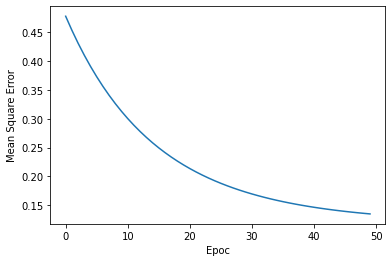

In [80]:
import matplotlib.pyplot as plt
plt.plot(range(len(cost)), cost)
plt.ylabel('Mean Square Error')
plt.xlabel('Epoc')
plt.show()


In [81]:
# For calculating the accuracy of the model,
# For both test and train model

ones = torch.ones(y_train.size())
# Returns a tensor filled with the scalar value 1
zero = torch.zeros(y_train.size())
# Returns a tensor filled with the scalar value 0

train_pred = model.forward(X_train)
train_acc = torch.mean((
    torch.where(train_pred > 0.5,
                ones, zero).int() == y_train).float())


ones = torch.ones(y_test.size())
zeros = torch.zeros(y_test.size())
test_pred = model.forward(X_test)
test_acc = torch.mean(
    (torch.where(test_pred > 0.5, ones, zeros).int() == y_test).float())

print('Training Accuracy: %.2f' % (train_acc*100), '%')
print('Testing Accuracy: %.2f' % (test_acc*100), '%')


Training Accuracy: 84.00 %
Testing Accuracy: 82.00 %
